In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [32]:
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

In [33]:
print('훈련용 리뷰 개수 :',len(train_data))

print('테스트용 리뷰 개수 :',len(test_data))


훈련용 리뷰 개수 : 150000
테스트용 리뷰 개수 : 50000


In [34]:
print(train_data.isnull().sum())
train_data.loc[train_data.document.isnull()]


id          0
document    5
label       0
dtype: int64


,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [35]:
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().sum())


id          0
document    0
label       0
dtype: int64


특수문자가 감정 표현의 역할을 할 때가 있으므로 .을 제외한 나머지 감정 표현을 위해 쓰이는 특수문자는 삭제하지 않았습니다

In [36]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ?!^;]","")
train_data[:5]

/tmp/ipykernel_572/3413504693.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ?!^;]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


문자열은 공란이면 none 값으로 처리되는 게 아니라,
빈 리스트처럼 무언가 존재하는 값으로 처리된다

이 값을 none으로 바꿔주는 코드가 아래와 같다


In [37]:
train_data['document'] = train_data['document'].str.replace('^ +', "")
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())


id            0
document    984
label         0
dtype: int64


/tmp/ipykernel_572/1966753476.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "")


In [38]:
print(train_data.isnull().values.any())

True


In [39]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

149011


아래는 문장을 입력하면, 맞춤법을 교정해서 return 해주는 모듈을 사용하는 방법에 대해 서술한 블로그 입니다
https://blog.naver.com/PostView.naver?blogId=dsz08082&logNo=222317249656&redirect=Dlog&widgetTypeCall=true&directAccess=false

hanspell 이라는 모듈이며, 해당 모듈을 이용해서 문장을 전처리 하고자 했지만,
install이 안되어 시도해보지는 못 했습니다

하지만 추후 해당 모듈이 왜 install이 안되었고,
어떻게 고칠 수 있는지를 알게 된다면 유용하게 쓰일 거 같아 기록해둡니다

In [40]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ?!^;]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))


/tmp/ipykernel_572/2294496749.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ?!^;]","") # 정규 표현식 수행


전처리 후 테스트용 샘플의 개수 : 48933


/tmp/ipykernel_572/2294496749.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


In [41]:
from konlpy.tag import Mecab

mecab = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


X_train = []
for sentence in train_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)


print(X_train[:3])



[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나'], ['너무', '재', '밓었다그래서보는것을추천한다']]


# 실패 코드

from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum


X_train_O = []
for sentence in train_data['document']:
    tokenized_sentence = Okt().morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train_O.append(stopwords_removed_sentence)

print(X_train_O[:3])


X_train_K = []
for sentence in train_data['document']:
    tokenized_sentence = Kkma().morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train_K.append(stopwords_removed_sentence)

print(X_train_K[:3])


X_train_Ko = []
for sentence in train_data['document']:
    tokenized_sentence = Komoran().morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train_Ko.append(stopwords_removed_sentence)

print(X_train_Ko[:3])


X_train_H = []
for sentence in train_data['document']:
    tokenized_sentence = Hannanum().morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train_H.append(stopwords_removed_sentence)
    
print(X_train_H[:3])


# 실패 원인:
konlpy API를 여러개 쓰면 에러가 뜬다는 조원님이 계셨는데,
다른 파일에서 Mecab 이외의 모듈을 써 봤는데 딱히 오류가 나지 않았기 때문에 그분 말이 맞는 거 같다

임베딩에 대한 차이를 직관적으로 보여주고 싶었지만, 불가능 하므로 글로 쓰겠습니다

각 API마다 다른 점은 문장 데이터가 어떤 식으로 맞춤법을 틀렸는지에 따라 쓰임새가 다릅니다
(임베딩 소요 시간도 각자 다릅니다)

아래 예시

사랑하고싶게하는가슴속온감정을헤집어놓는영화예요정말최고

Mecab: [[‘사랑/NNG’, ‘하/XSV’, ‘고/EC’, ‘싶/VX’, ‘게/EC’, ‘하/VV’, ‘는/ETM’, ‘가슴속/NNG’, ‘온/VV+ETM’, ‘감정/NNG’, ‘을/JKO’, ‘헤집/VV’, ‘어/EC’, ‘놓/VX’, ‘는/ETM’, ‘영화/NNG’, ‘예요/VCP+EF’, ‘정말/MAG’, ‘최고/NNG’]]

Komoran: [[‘사랑/NNG’, ‘하/XSV’, ‘고/EC’, ‘싶/VX’, ‘게/EC’, ‘하/VX’, ‘는/ETM’, ‘가슴속/NNG’, ‘오/VV’, ‘ㄴ/ETM’, ‘감정/NNP’, ‘을/JKO’, ‘헤집/VV’, ‘어/EC’, ‘놓/VX’, ‘는/ETM’, ‘영화/NNP’, ‘예/NNG’, ‘요정/NNP’, ‘말/NNG’, ‘최고/NNP’]]

Kkma: [[‘사랑/NNG’, ‘하/XSV’, ‘고/ECE’], [‘싶/VXA’, ‘게/ECD’], [‘하/VV’, ‘는/ETD’], [‘가슴속/NNG’], [‘오/VV’, ‘ㄴ/ETD’], [‘감정/NNG’, ‘을/JKO’], [‘헤집/VV’, ‘어/ECD’], [‘놓/VXV’, ‘는/ETD’], [‘영화/NNG’, ‘이/VCP’, ‘에요/EFN’], [‘정말/MAG’], [‘최고/NNG’]]

Okt: [‘사랑/Noun’, ‘하다/Verb’, ‘싶다/Verb’, ‘가슴속/Noun’, ‘온/Noun’, ‘감정/Noun’, ‘을/Josa’, ‘헤집다/Verb’, ‘영화/Noun’, ‘예요/Josa’, ‘정말/Noun’, ‘최고/Noun’]


너무재밓었다그래서보는것을추천한다

Mecab: [[‘너무/MAG’, ‘재/XPN’, ‘밓었다그래서보는것을추천한다/UNKNOWN’]]

Komoran: [[‘너무재밓었다그래서보는것을추천한다/NA’]]

Kkma: [[‘너무/MAG’], [‘재/NNG’], [‘밓/UN’], [‘어/VV’, ‘었/EPT’, ‘다/EFN’], [‘그래서/MAC’], [‘보/VV’, ‘는/ETD’], [‘것/NNB’, ‘을/JKO’], [‘추천/NNG’, ‘하/XSV’, ‘ㄴ다/EFN’]]

Okt: [‘너/Modifier’, ‘무재/Noun’, ‘밓었/Noun’, ‘다그/Noun’, ‘래서/Noun’, ‘보다/Verb’, ‘추천/Noun’, ‘한/Josa’, ‘다/Adverb’]


너무재밋었다그래서보는것을추천한다

Mecab: [[‘너무/MAG’, ‘재/XPN’, ‘밋/NNG’, ‘었/EP’, ‘다/EF’, ‘그래서/MAJ’, ‘보/VV’, ‘는/ETM’, ‘것/NNB’, ‘을/JKO’, ‘추천/NNG’, ‘한다/XSV+EC’]]

Komoran: [[‘너무재밋었다그래서보는것을추천한다/NA’]]

Kkma: [[‘너무/MAG’], [‘재/NNG’], [‘밋/UN’], [‘어/VV’, ‘었/EPT’, ‘다/EFN’], [‘그래서/MAC’], [‘보/VV’, ‘는/ETD’], [‘것/NNB’, ‘을/JKO’], [‘추천/NNG’, ‘하/XSV’, ‘ㄴ다/EFN’]]

Okt: [‘너무/Adverb’, ‘재밌다/Adjective’, ‘그래서/Adverb’, ‘보다/Verb’, ‘추천/Noun’, ‘한/Josa’, ‘다/Adverb’]



출처: https://soohee410.github.io/compare_tagger


In [42]:
X_test = []
for sentence in test_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [44]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 49940
등장 빈도가 2번 이하인 희귀 단어의 수: 28247
단어 집합에서 희귀 단어의 비율: 56.56187424909892
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.7074476719816445


In [45]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 21694


In [46]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [47]:
print(X_train[:3])

[[26, 66, 902, 32, 218, 14, 28, 707], [975, 486, 496, 638, 1, 109, 1568, 47, 872, 958, 9, 38, 367], [18, 192]]


In [48]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [49]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

print(drop_train)

[10, 793, 3122, 4312, 4414, 5328, 6084, 6371, 6595, 7193, 9156, 9746, 9906, 11127, 12019, 12237, 12900, 15868, 16630, 16705, 17326, 17778, 18862, 19240, 19925, 20029, 20334, 20640, 24681, 24943, 26665, 27492, 28065, 28300, 28410, 28612, 28880, 30054, 30638, 31280, 34753, 35468, 38079, 39924, 40200, 41343, 41669, 43437, 43540, 44740, 46742, 48281, 49678, 49708, 50210, 51219, 51611, 52719, 54586, 55628, 56405, 56755, 57302, 58014, 58083, 58334, 59471, 61092, 62571, 62795, 63126, 63253, 64028, 64855, 65180, 65549, 65878, 65951, 68291, 69029, 69604, 69781, 71010, 72726, 73105, 74165, 74729, 75712, 76320, 77469, 77715, 78832, 79006, 79659, 80036, 80518, 80807, 81334, 81410, 82230, 83061, 85237, 86842, 87087, 87295, 88045, 89123, 89251, 89363, 89399, 90767, 90798, 90936, 93687, 93742, 95588, 95746, 97072, 98582, 101442, 101897, 102786, 105167, 105333, 106989, 107105, 109343, 109356, 109474, 109841, 112692, 113990, 114289, 116122, 116781, 117086, 118590, 118598, 120727, 120753, 121039, 121130

In [50]:
print(len(X_train))
print(len(y_train))

X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

149011
149011
148832
148832


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 83
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.628984358202537


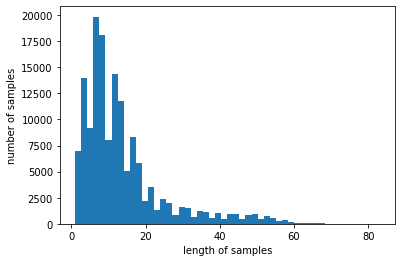

In [51]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 최소 길이 :',min(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [52]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 30
below_threshold_len(max_len, X_train)


전체 샘플 중 길이가 30 이하인 샘플의 비율: 90.87763384218448


In [53]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [54]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1861/1861 [==============================] - 12s 6ms/step - loss: 0.3844 - acc: 0.8271 - val_loss: 0.3407 - val_acc: 0.8509

Epoch 00001: val_acc improved from -inf to 0.85088, saving model to best_model.h5
Epoch 2/15
1861/1861 [==============================] - 10s 5ms/step - loss: 0.3179 - acc: 0.8636 - val_loss: 0.3210 - val_acc: 0.8610

Epoch 00002: val_acc improved from 0.85088 to 0.86102, saving model to best_model.h5
Epoch 3/15
1861/1861 [==============================] - 10s 5ms/step - loss: 0.2903 - acc: 0.8792 - val_loss: 0.3145 - val_acc: 0.8646

Epoch 00003: val_acc improved from 0.86102 to 0.86458, saving model to best_model.h5
Epoch 4/15
1861/1861 [==============================] - 10s 5ms/step - loss: 0.2700 - acc: 0.8895 - val_loss: 0.3218 - val_acc: 0.8662

Epoch 00004: val_acc improved from 0.86458 to 0.86619, saving model to best_model.h5
Epoch 5/15
1861/1861 [==============================] - 10s 5ms/step - loss: 0.2529 - acc: 0.8982 - val_loss: 0.3125 - 

In [55]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1530/1530 [==============================] - 4s 2ms/step - loss: 0.3209 - acc: 0.8632

 테스트 정확도: 0.8632


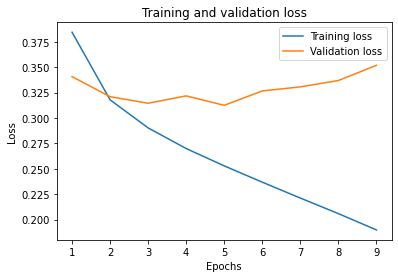

In [56]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs ,loss, label='Training loss')
plt.plot(epochs ,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=350)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.6622524676598615

In [58]:
params = {
    'metric': 'acc',
    'learning_rate': 0.05,
    'max_depth': -1,          
    'num_leaves': 500,        
    'feature_fraction': 0.8, 
    'bagging_fraction': 0.7, 
    'bagging_freq': 5,
    'lambda' : 0.8
}

lgbm = lgb.LGBMClassifier(**params)
lgbm.fit(X_train,y_train)
lgb_pred = lgbm.predict(X_test)
accuracy_score(y_test, lgb_pred)

[LightGBM] [Warning] lambda_l2 is set with lambda=0.8, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


0.7225798540861995

In [61]:
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = mecab.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))
    

In [62]:
practice = '영화 리뷰 입력'

sentiment_predict(practice)

73.51% 확률로 부정 리뷰입니다.



## 회고

5주차 정도 되었으면
이제 슬슬 완벽하지는 않더라도 처음부터 끝까지 코드를 쌓을 수 있지 않을까 싶었는데,
거의 대부분을 인터넷에서 찾은 그대로 복붙했습니다

가장 기억에 남는 부분은,
pd.read_table() 로 불러온 데이터는 int도 str도 아닌 취급이 되더군요
그런데 pd.dropna() 를 해서 결측치를 없애면,
그때부터 pd 객체로 인식되어 int 혹은 str 취급이 됩니다

그동안 배운 지식들을 이용하면 분명 혼자 쌓을 수 있을 거 같은데,
아무것도 없는 상태에서는 아무리 발버둥을 쳐봐도 쌓으면 쌓을 수록 에러만 발생하네요

아무래도 이번 설연휴 때 그동안 배운 기능을 라이브러리화 시켜서
어딘가에 저장해 바로바로 쓸 수 있게 해야겠습니다


## 다음 목표

프로젝트를 끝내는데 드는 시간을 줄이기 어떻게든 줄이기